In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'

df = pd.read_excel(url)

df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape
#There are 6969 rows and 23 columns

(6969, 23)

In [ ]:
df.nunique()
#Unique values in each column

Date              6003
Year               259
Type                12
Country            225
State              902
Location          4514
Activity          1587
Name              5683
Sex                  8
Age                243
Injury            4079
Unnamed: 11         12
Time               410
Species           1675
Source            5302
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

In [ ]:
# dropping unnecessary columns. pdf:Unnamed 22
df = df.drop(df.columns[14:],axis = 1)
# drop column Unnamed 11
df = df.drop(df.columns[11],axis=1)
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8'
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Date          25
Year          27
Type          43
Country       75
State        507
Location     590
Activity     611
Name         245
Sex          604
Age         3019
Injury        60
Time        3551
Species     3157
dtype: int64

In [ ]:
import re
# cleaning the Age column. Converting the values to int and replacing the Nan values with the mode

# Find mode value
mode_value = df['Age'].mode()[0]

# Replace blank spaces with mode value
df['Age'] = df['Age'].replace('', mode_value)

# Convert age into an integer
df['Age'] = df['Age'].fillna(mode_value)
df['Age'] = df['Age'].str.lstrip()
df['Age'] = df['Age'].str.rstrip()
df['Age'] = df['Age'].str[:2]

# Apply regex to extract digits
pattern = r'\d+'
df['Age'] = df['Age'].apply(lambda x: ''.join(re.findall(pattern, str(x))))

# Replace empty strings with NaN
df['Age'] = df['Age'].replace('', np.nan)

# Convert dtype to float
df['Age'] = df['Age'].astype(float).fillna(mode_value).astype(int)

# Check unique values
df['Age'].unique()



array([13, 16, 11, 46, 32, 29, 10, 64, 62, 39, 22, 15, 21, 66, 52, 20, 44,
       26, 47, 55, 30, 59,  8, 50, 45, 34, 38, 37,  9, 19, 35, 65, 77, 60,
       49, 42,  2, 24, 73, 25, 18, 58, 67, 17, 14,  6, 41, 53, 68, 43, 40,
       51, 31, 28, 23, 12, 36, 63, 71, 48, 70, 57,  7, 33, 61, 74, 27,  3,
       56,  5, 54, 86, 69, 87,  4, 81, 78,  1])

In [ ]:
# confirming that our Age column is not blank and all rows have an Age Value
blank_occurrences = df[df['Age'] == '']
blank_occurrences.shape[0]

0

In [ ]:
# Top locations of shark attacks
value_counts = df['Location'].value_counts()
value_counts

Location
New Smyrna Beach, Volusia County                            191
Daytona Beach, Volusia County                                31
Ponce Inlet, Volusia County                                  28
Myrtle Beach, Horry County                                   22
Melbourne Beach, Brevard County                              20
                                                           ... 
Limay                                                         1
Pau Amarelo Beach, Paulista District (17 km from Recife)      1
Melbourne Beach, Brevard County                               1
Shepard Park, Cocoa Beach, Brevard County                     1
Below the English fort, Trincomalee                           1
Name: count, Length: 4514, dtype: int64

In [ ]:
# How the shark attacked were caused
df["Type"].value_counts()

Type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [ ]:
# cleaning the Type column
type_combine = {' Provoked': 'Provoked'}
df['Type'].replace(type_combine, inplace=True)
df['Type'].value_counts()

Type
Unprovoked             5107
Provoked                637
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [ ]:
# attempt to clean up the species data. Future enchancements: Get insight into the species that are more common to provide better marketing for KAGE
df.rename(columns = {"Species ": "Species"}, inplace = True) #changed the name and made it permanent
df["Species"].value_counts() #<- encountered an error when running, after finding "df.columns", found out Species has a space at the end

Species
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                 

In [ ]:
state_data = df['State'].value_counts().head(20)
state_data

State
Florida                  1178
New South Wales           521
Queensland                347
Hawaii                    341
California                323
Western Australia         231
KwaZulu-Natal             218
Western Cape Province     197
South Carolina            172
Eastern Cape Province     168
North Carolina            118
South Australia           115
Victoria                   95
Pernambuco                 80
Texas                      78
North Island               76
Torres Strait              70
New Jersey                 56
South Island               45
New York                   45
Name: count, dtype: int64

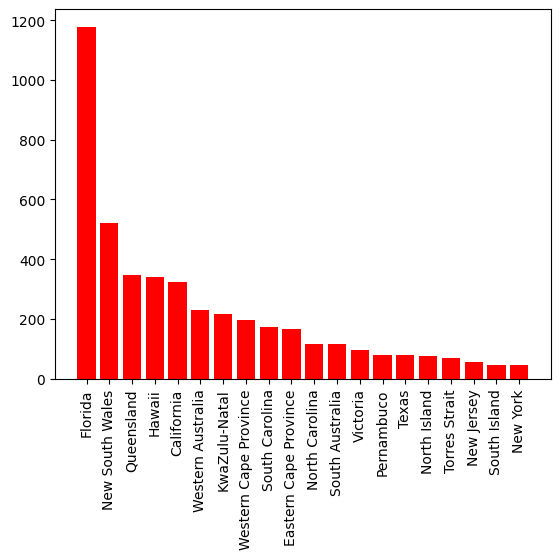

In [ ]:
#  the state column
plt.bar(state_data.index,state_data,color = "red")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# State of Florida has the most shark attacks.
# Dig deeper to get specific location for the most attacks
florida_data = df[df['State'] == 'Florida']
florida_data

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
24,05 Nov-2023,2023.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Steven Reinhardt,M,66,Lacerations to right forearm,10h30,NaN
40,12 Sep-2023,2023.0,Questionable,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Mark Summersett,M,38,Llacerations to face and chin,07h50,NaN
41,11 Sep-2023,2023.0,Unprovoked,USA,Florida,"Satellite Beach, Brevard County",Surfing,Bill Eveland,M,16,Bite to lower back,NaN,NaN
44,04 Sep 2023,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,male,M,30,Left hand bitten,NaN,NaN
45,04 Sep 2023,2023.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Wading,female,F,37,Right foot bitten,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,16,Hand bitten,NaN,NaN
6868,"No date, Before 1975",0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,16,"Ankle punctured & lacerated, hands abraded PRO...",NaN,"Nurse shark, 2.1 m [7']"
6875,"No date, Before 1902",0.0,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,16,FATAL,NaN,NaN
6891,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,16,Abrasions & bruises hip to ankle,NaN,NaN


In [ ]:
florida_data_location = florida_data['Location'].value_counts().head(10)
florida_data_location

Location
New Smyrna Beach, Volusia County    231
Daytona Beach, Volusia County        39
Cocoa Beach, Brevard County          31
Jacksonville Beach, Duval County     20
Melbourne Beach, Brevard County      20
Florida Keys, Monroe County          19
Juno Beach, Palm Beach County        12
Ormond Beach, Volusia County         11
Palm Beach, Palm Beach County        11
Vero Beach, Indian River County      10
Name: count, dtype: int64

In [ ]:
florida_data.replace('Jacksonville, Duval County', 'Jacksonville Beach, Duval County', inplace=True)
florida_data['Location'].value_counts()

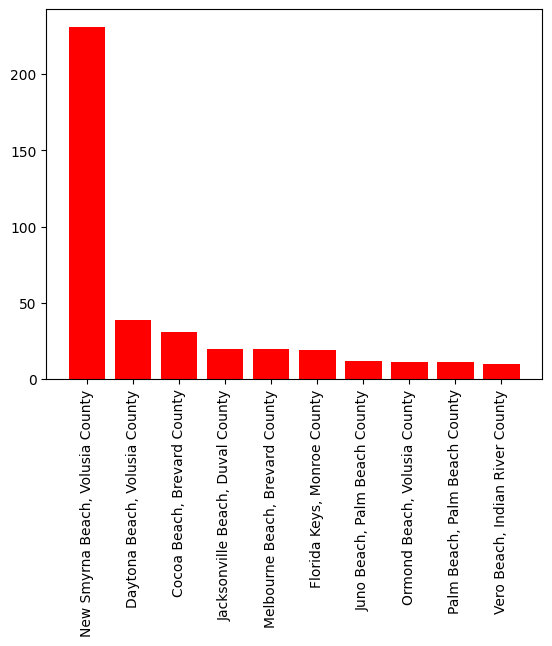

In [ ]:
#  data for the location column filtered to Florida beaches
plt.bar(florida_data_location.index, florida_data_location, color = "red")
plt.xticks(rotation=90)
plt.show()

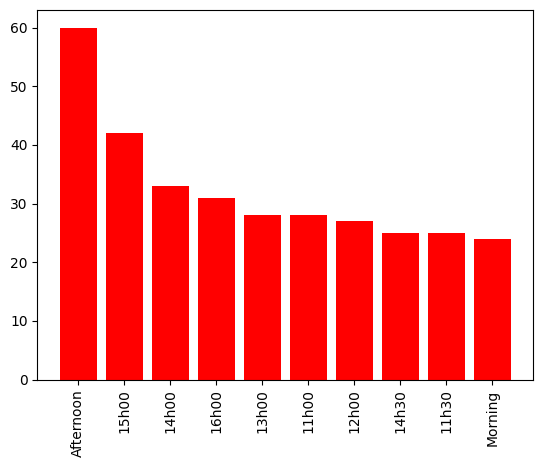

In [ ]:
# best time to go to New Smyrna Beach for Shark excursion. Future enchancements: Clean the time column to get better insights into the ideal time of day to go into the KAGE at New Smyrna Beach
florida_data["Time"].unique()
time_data = florida_data["Time"].value_counts().head(10)
plt.bar(time_data.index, time_data, color = "red")
plt.xticks(rotation=90)
plt.show()